# Driving Behavior
### Using Deep Learning to predict driving behavior

### Import

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

2023-09-20 14:36:06.736011: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-20 14:36:06.773006: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-20 14:36:06.773583: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-20 14:36:10.217568: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Load the datasets

In [3]:
df_train = pd.read_csv('./data/train_motion_data.csv')
df_test = pd.read_csv('./data/test_motion_data.csv')
print("Train size: " + str(df_train.size) + " | Test size: " + str(df_test.size))

Train size: 29152 | Test size: 24672


### Dataset info and visualization

In [4]:
df_train

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3644 non-null   float64
 1   AccY       3644 non-null   float64
 2   AccZ       3644 non-null   float64
 3   GyroX      3644 non-null   float64
 4   GyroY      3644 non-null   float64
 5   GyroZ      3644 non-null   float64
 6   Class      3644 non-null   object 
 7   Timestamp  3644 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 227.9+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3084 non-null   float64
 1   AccY       3084 non-null   float64
 2   AccZ       3084 non-null   float64
 3   GyroX      3084 non-null   float64
 4   GyroY      3084 non-null   float64
 5   GyroZ      3084 non-null   float64
 6   Class      3084 non-null   object 
 7   Timestamp  3084 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 192.9+ KB


Distribution by class

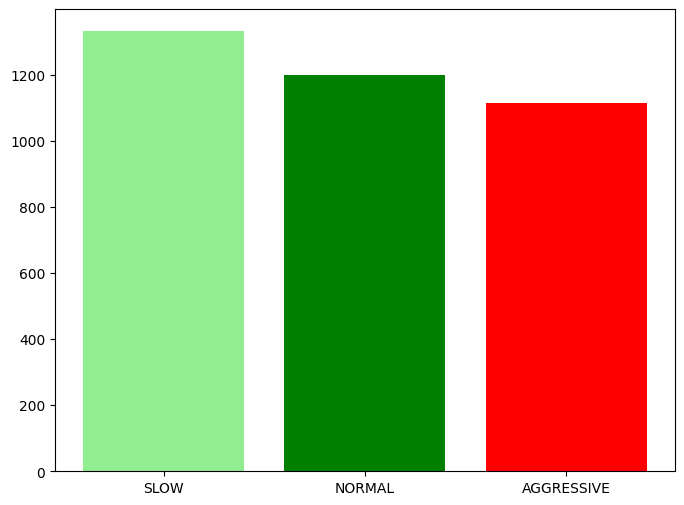

In [7]:
counts = df_train['Class'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(counts.index, counts.values, color=['lightgreen', 'green', 'red'])
plt.show()

Mapping labels to numbers

In [8]:
df_train_num = df_train.replace({"Class" : {"SLOW":1, "NORMAL": 2, "AGGRESSIVE":3}})

Correlation matrix

<Axes: >

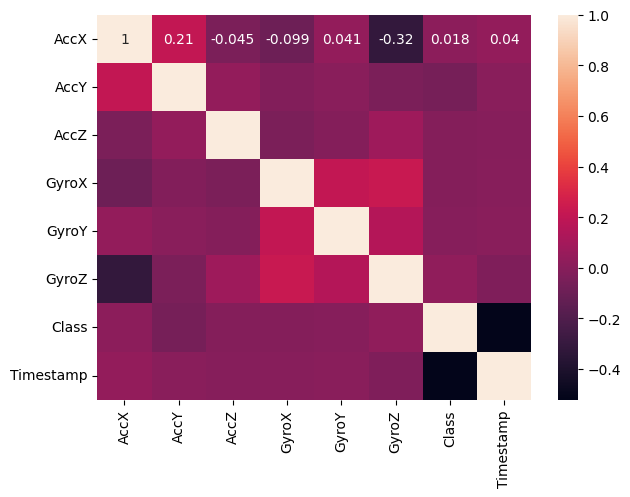

In [9]:
plt.figure(figsize=(7,5))
sns.heatmap(df_train_num.corr(), annot=True)

#### Noise analysis on data

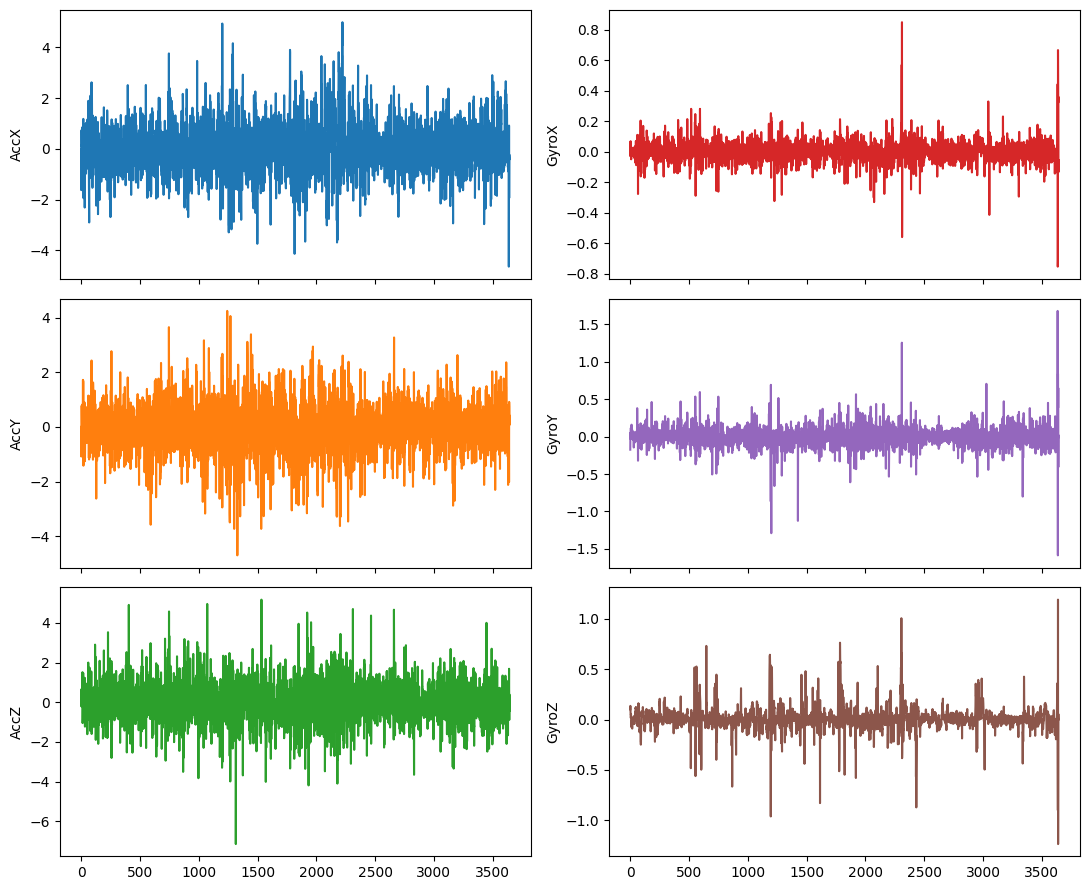

In [25]:

fig, axs = plt.subplots(3, 2, figsize=(11, 9), sharex=True)

colors =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
# Graficar AccX
axs[0,0].plot(df_train['AccX'], color=colors[0])
axs[0,0].set_ylabel('AccX')

# Graficar AccY
axs[1,0].plot(df_train['AccY'], color=colors[1])
axs[1,0].set_ylabel('AccY')

# Graficar AccZ
axs[2,0].plot(df_train['AccZ'], color=colors[2])
axs[2,0].set_ylabel('AccZ')

# Graficar AccX
axs[0,1].plot(df_train['GyroX'], color=colors[3])
axs[0,1].set_ylabel('GyroX')

# Graficar AccY
axs[1,1].plot(df_train['GyroY'], color=colors[4])
axs[1,1].set_ylabel('GyroY')

# Graficar AccZ
axs[2,1].plot(df_train['GyroZ'], color=colors[5])
axs[2,1].set_ylabel('GyroZ')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Verificación de existencia de valores NaN

In [136]:

df_train.isna().sum()


AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

### Remove unnecessary columns

In [137]:
df_train = df_train.drop(['Timestamp'], axis=1)
df_test = df_test.drop(['Timestamp'], axis=1)

### Convert the labels to numeric values

In [138]:
df_train['Class'] = df_train['Class'].replace({ 'SLOW'       : 0,
                                                'NORMAL'     : 1,
                                                'AGGRESSIVE' : 2})

df_test['Class'] = df_test['Class'].replace({   'SLOW'       : 0,
                                                'NORMAL'     : 1,
                                                'AGGRESSIVE' : 2})

### Separate the data into X and y

In [139]:
y=df_train['Class']
X=df_train.drop('Class', axis=1)

y_test=df_test['Class']
X_test=df_test.drop('Class', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size  = 0.2, shuffle=True, random_state=33)


### Scale the data

In [140]:
scaler = StandardScaler()

X_train = scaler.fit_transform((X_train))
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#scaler.fit(X_train)

#X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns, index=X_train.index)

#X_val = pd.DataFrame(scaler.transform(X_val), columns = X_val.columns, index=X_val.index)

#X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index=X_test.index)



### One-hot encode the labels

In [141]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

### Define the model

In [142]:
model = keras.Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(3, activation="softmax")
])

### Compile the model

In [143]:

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [144]:
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_val, y_val),
)


Epoch 1/50
6/6 [==============================] - 1s 30ms/step - loss: 1.1115 - accuracy: 0.3255 - val_loss: 1.1078 - val_accuracy: 0.3289
Epoch 2/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0937 - accuracy: 0.3613 - val_loss: 1.1015 - val_accuracy: 0.3416
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 1.0820 - accuracy: 0.3874 - val_loss: 1.0977 - val_accuracy: 0.3477
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 1.0728 - accuracy: 0.4258 - val_loss: 1.0951 - val_accuracy: 0.3673
Epoch 5/50
6/6 [==============================] - 0s 8ms/step - loss: 1.0658 - accuracy: 0.4231 - val_loss: 1.0940 - val_accuracy: 0.3659
Epoch 6/50
6/6 [==============================] - 0s 8ms/step - loss: 1.0597 - accuracy: 0.4341 - val_loss: 1.0926 - val_accuracy: 0.3649
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 1.0543 - accuracy: 0.4396 - val_loss: 1.0913 - val_accuracy: 0.3604
Epoch 8/50
6/6 [================

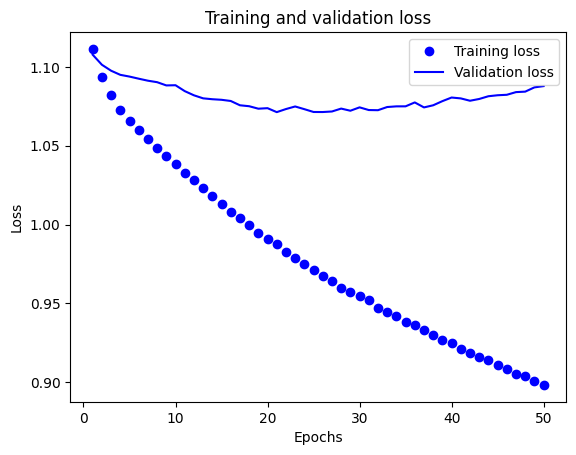

In [145]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

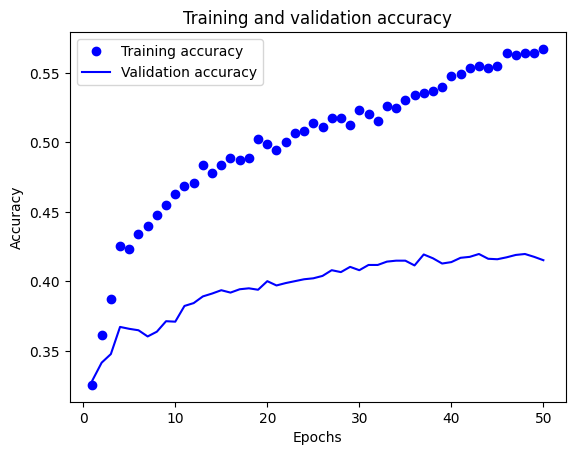

In [146]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Evaluación del modelo en test set

In [147]:
score = model.evaluate(X_test, y_test, batch_size=128)
score

25/25 [==============================] - 0s 1ms/step - loss: 1.1051 - accuracy: 0.4021


[1.1051212549209595, 0.40207523107528687]